In [53]:
#Dependencies
import requests
import json
import pandas as pd
import numpy as np
from numpy import random 
import matplotlib.pyplot as plt
from collections import deque
from scipy.stats import linregress
import matplotlib.pyplot as plt 

In [2]:
# tv maze show search base url (this is to search for individual shows)
base_url = "http://api.tvmaze.com/search/shows?q="

# Question 1
#Which networks, on average, have higher TV show ratings?

In [3]:
# Question 1


#calc random page numbers as sample



#URL for all primary information for every show in the database

q1URL = "http://api.tvmaze.com/shows?page="


networks = []
ratings= []
ids=[]


print("starting pull")

#this pulls every ID from the first 50 pages
for page in range(50):
    target_urlq1 = f"{q1URL} + {page}"
    response =requests.get(target_urlq1).json()
    for x in response:
        ids.append(x['id'])
print(f"ids done")

#this pulls every rating from the first 50 pages
for page in range(50):
    target_urlq1 = f"{q1URL} + {page}"
    response =requests.get(target_urlq1).json()    
    for i in response:
        ratings.append(i['rating']['average'])
        
print(f"ratings done")
#this pulls every network from the first 50 pages
for page in range(50):
    target_urlq1 = f"{q1URL} + {page}"
    response =requests.get(target_urlq1).json()
    for w in response:
        try:
            networks.append(w['network']['name'])
        except:
            networks.append("Null")

print(f"networks done")
print("pull completed")
print("Length check:")
print(len(networks))
print(len(ids))
print(len(ratings))
#double check that every thing lines up in the API call after you visualize
    
    
#maybe not needed but keeping code just in case:   
#associating IDs which are the only unique value in the API with network names and ratings so that we could merge the dictionaries later?    
#zip_it1 = zip(ids, networks)
#zip_it2 = zip(ids, ratings)
#dictionary1 = dict(zip_it1)
#dictionary2 = dict(zip_it2) 
   

starting pull
ids done
ratings done
networks done
pull completed
Length check:
11804
11804
11804


In [4]:
#Question 1
#create df 
quest1df = pd.DataFrame({'IDs': ids, "Networks": networks, "Ratings": ratings})
quest1df.head(50)



,IDs,Networks,Ratings
0,1,CBS,6.5
1,2,CBS,8.9
2,3,CTV Sci-Fi Channel,7.5
3,4,The CW,7.4
4,5,HBO,8.3
5,6,The CW,7.7
6,7,Showtime,8.2
7,8,FOX,6.8
8,9,ABC,7.8
9,10,NBC,8.5


In [5]:
#Summary Statistics 

mean=quest1df.groupby(["Networks"]).mean()["Ratings"]

analysis_df=pd.DataFrame({"mean network rating":mean})

# Format

analysis_df=analysis_df.round(2)

analysis_df

,mean network rating
Networks,
1+1,7.00
1-й Балтийский канал,NaN
10 Bold,NaN
10 Peach,7.50
1TV,NaN
...,...
ТВ-3,5.90
ТНТ,7.18
Україна,NaN


In [6]:
#Sort
analysis_df.sort_values(by=['mean network rating'], inplace=True, ascending=False)
analysis_df.head()

#Clean
clean_analysis_df = analysis_df.dropna(how="any")
clean_analysis_df.head()

,mean network rating
Networks,
Star TV,9.8
Smithsonian,9.5
Channel 9 MCOT HD,9.2
France 2,9.2
ESPN2,9.0


In [7]:
#Top 20 rated networks data frame

first20_networks =clean_analysis_df.head(20)

first20_networks = pd.DataFrame(first20_networks)
newfirst20_networks = first20_networks.reset_index().set_index('Networks')
newfirst20_networks

,mean network rating
Networks,
Star TV,9.80
Smithsonian,9.50
Channel 9 MCOT HD,9.20
France 2,9.20
ESPN2,9.00
Lifetime Movies,8.80
CBS Sports Network,8.80
BBC Scotland,8.80
SUN-TV,8.80


In [8]:
#Lowest rated networks Data Frame

last20_networks =clean_analysis_df.tail(20)

last20_networks = pd.DataFrame(last20_networks)
newlast20_networks = last20_networks.reset_index().set_index('Networks')
newlast20_networks

,mean network rating
Networks,
Quest,6.30
TLC,6.27
VTM,6.20
Pop,6.15
E!,6.04
France 4,6.00
AXS TV,6.00
City,6.00
ТВ-3,5.90


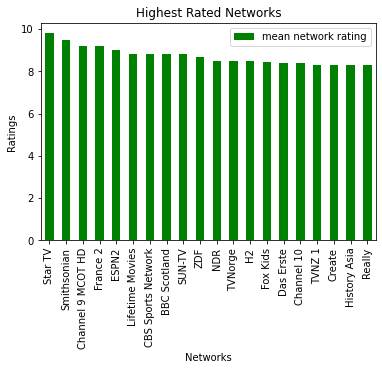

<Figure size 2880x1440 with 0 Axes>

NameError: name 'fig' is not defined

In [9]:
#Plot Highest Rated Networks

newfirst20_networks.plot(kind="bar", facecolor='green', width=.5)


plt.ylabel("Ratings")
plt.xlabel("Networks")
plt.title("Highest Rated Networks")
plt.figure(figsize=(40,20))
plt.show()

# fig.savefig("HighestRatedNetworks.png")

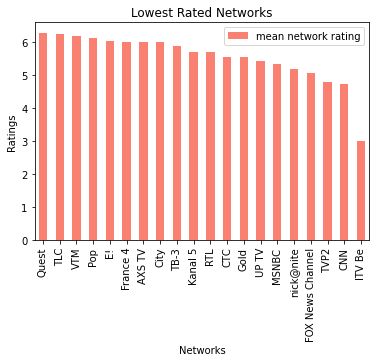

<Figure size 2880x1440 with 0 Axes>

<Figure size 432x288 with 0 Axes>

In [10]:
#Plot Lowest Rated Networks

last20_networks.plot(kind="bar", facecolor='salmon', width=.5)


plt.ylabel("Ratings")
plt.xlabel("Networks")
plt.title("Lowest Rated Networks")
plt.figure(figsize=(40,20))
plt.show()

#plt.savefig("LowestRatedNetworks.png")

In [11]:
#Question: Does the number of times a network was pulled potentially influence the ratings above?

#sorts the dataframe by value counts
networkscolumn = quest1df["Networks"]
groupedq1 = quest1df.groupby('Networks')
meanratings = groupedq1['Ratings'].mean()
meandfq1 = pd.DataFrame(meanratings)
meandfq1 = meandfq1.dropna(how="any")
meandfq1['Value Counts'] = networkscolumn.value_counts(sort=True)
sorteddf =meandfq1.sort_values(by='Value Counts', ascending=False)
sorteddf

,Ratings,Value Counts
Networks,,
BBC One,7.868023,615
ABC,7.317200,565
ITV,7.881053,531
NBC,7.410577,427
Null,7.445714,425
...,...,...
T+E,6.800000,1
Really,8.300000,1
Smithsonian,9.500000,1


In [12]:
#helps us visualize the data so that we can take out outliers
sorteddf['Value Counts'].describe()

count    219.000000
mean      45.689498
std       88.303919
min        1.000000
25%        6.000000
50%       20.000000
75%       44.000000
max      615.000000
Name: Value Counts, dtype: float64

In [13]:
#helps us visualize the data so that we can take out outliers
sorteddf['Ratings'].describe()

count    219.000000
mean       7.466274
std        0.841759
min        3.000000
25%        7.118229
50%        7.600000
75%        7.947222
max        9.800000
Name: Ratings, dtype: float64

In [14]:
#taking out ratings outliers. 3 SDs above and below the mean were taken out
sorteddfnooutlier =sorteddf.loc[(sorteddf["Ratings"]) <= 9.98]
sorteddfnooutlier =sorteddfnooutlier.loc[(sorteddf["Ratings"]) >= 4.94 ]
sorteddfnooutlier

,Ratings,Value Counts
Networks,,
BBC One,7.868023,615
ABC,7.317200,565
ITV,7.881053,531
NBC,7.410577,427
Null,7.445714,425
...,...,...
T+E,6.800000,1
Really,8.300000,1
Smithsonian,9.500000,1


In [15]:
#take out the value count outliers. 3 SDs above the mean were taken out.
sorteddfnooutlierfinal =sorteddfnooutlier.loc[(sorteddf["Value Counts"]) <= 309]

sorteddfnooutlierfinal

,Ratings,Value Counts
Networks,,
FOX,7.320968,231
Syndication,6.929545,186
Discovery Channel,7.602941,150
Tokyo MX,7.304167,136
TV Tokyo,7.628571,124
...,...,...
T+E,6.800000,1
Really,8.300000,1
Smithsonian,9.500000,1


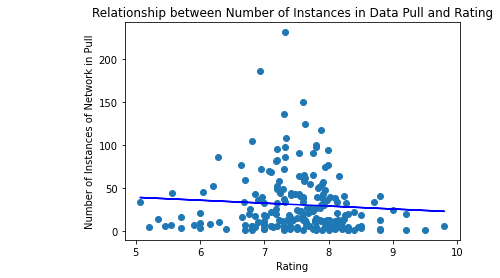

r squared: 0.005541763506659328
y = -3.4x + 55.93


<Figure size 432x288 with 0 Axes>

In [16]:
yval = sorteddfnooutlierfinal['Value Counts']
xval = sorteddfnooutlierfinal['Ratings']

(slope, intercept, rvalue, pvalue, stderr) = linregress(xval, yval)

regressionvals = xval * slope + intercept
equation = f'y = {str(round(slope,2))}x + {str(round(intercept,2))}'
plt.scatter(xval,yval)
plt.plot(xval, regressionvals, "b-")
plt.annotate(equation,(3,10), fontsize=15, color="black")
plt.title("Relationship between Number of Instances in Data Pull and Rating")
plt.xlabel("Rating")
plt.ylabel("Number of Instances of Network in Pull")
plt.show()

print(f"r squared: {rvalue**2}")
print(equation)

#plt.savefig("NetworkCorrelation.png")

In [17]:
print("there is a very weak association between the number of instances of a network in a pull and the rating")

there is a very weak association between the number of instances of a network in a pull and the rating


# Question 2
#Which TV Shows are the most popular?

In [18]:
#Question 2

#URL for all primary information for every show in the database

q1URL = "http://api.tvmaze.com/shows?page="



shows = []
ratings2 = []
ids2= []


print("Starting pull")

#this pulls every ID from the first 50 pages
for page in range(50):
    target_urlq1 = f"{q1URL} + {page}"
    response =requests.get(target_urlq1).json()
    for x in response:
        ids2.append(x['id'])
print(f"ids done")

#this pulls every show from the first 50 pages
for page in range(50):
    target_urlq1 = f"{q1URL} + {page}"
    response =requests.get(target_urlq1).json()    
    for i in response:
        shows.append(i['name'])
        
print(f"shows done")



#this pulls every rating from the first 50 pages
for page in range(50):
    target_urlq1 = f"{q1URL} + {page}"
    response =requests.get(target_urlq1).json()    
    for i in response:
        ratings2.append(i['rating']['average'])
        
print(f"ratings done")

print("length check:")   
print(len(ids2))
print(len(shows))
print(len(ratings2))
    

Starting pull
ids done
shows done
ratings done
length check:
11804
11804
11804


In [19]:
#Question 2
#create df 
quest2df = pd.DataFrame({'IDs': ids2, "Shows": shows, "Ratings": ratings2})
len(quest2df)

11804

In [20]:
quest2df.sort_values(by=['Ratings'], inplace=True, ascending=False)
quest2df.head()

,IDs,Shows,Ratings
7314,7733,Louis Theroux's Weird Weekends,9.8
7164,7580,Kara Sevda,9.8
590,607,Air Warriors,9.5
745,768,Planet Earth,9.5
4258,4517,Saint Seiya,9.4


In [21]:
quest2dfclean = quest2df.dropna(how="any")
quest2dfclean.head()

,IDs,Shows,Ratings
7314,7733,Louis Theroux's Weird Weekends,9.8
7164,7580,Kara Sevda,9.8
590,607,Air Warriors,9.5
745,768,Planet Earth,9.5
4258,4517,Saint Seiya,9.4


In [22]:
first20 =quest2dfclean.head(20)

first20 = pd.DataFrame(first20)
newfirst20 = first20.reset_index().set_index('Shows')
newfirst20_drop=newfirst20.drop(columns=['index', 'IDs'])
newfirst20_drop

,Ratings
Shows,
Louis Theroux's Weird Weekends,9.8
Kara Sevda,9.8
Air Warriors,9.5
Planet Earth,9.5
Saint Seiya,9.4
The Blue Planet,9.4
Band of Brothers,9.4
Dragnet,9.3
House Husbands,9.3


In [23]:
last20 = quest2dfclean.tail(20)

last20 = pd.DataFrame(last20)
newlast20 = last20.reset_index().set_index('Shows')
newlast20_drop=newlast20.drop(columns=['index', 'IDs'])
newlast20_drop

,Ratings
Shows,
Detroiters,4.0
The Wall,4.0
I Am Cait,3.8
Lavalantula,3.8
Anderson Cooper 360°,3.8
Keeping Up with the Kardashians,3.7
"Neon Joe, Werewolf Hunter",3.7
Ex on the Beach,3.6
Rachael Ray,3.5


In [24]:
type(last20)

pandas.core.frame.DataFrame

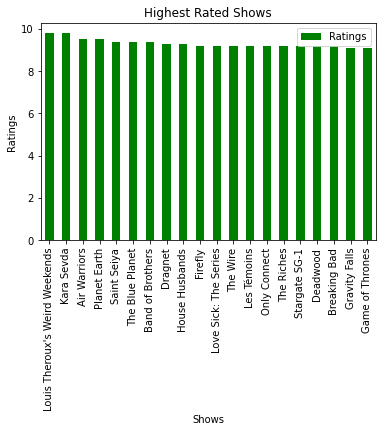

<Figure size 2880x1440 with 0 Axes>

<Figure size 432x288 with 0 Axes>

In [25]:
#Plot Highest Rated Shows

newfirst20_drop.plot(kind="bar", facecolor='green', width=.5)


plt.ylabel("Ratings")
plt.xlabel("Shows")
plt.title("Highest Rated Shows")
plt.figure(figsize=(40,20))
plt.show()

#plt.savefig("HighestRatedShows.png")

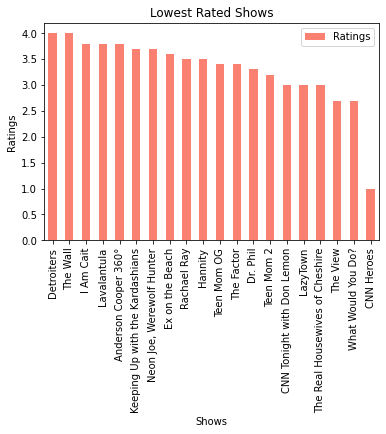

<Figure size 2880x1440 with 0 Axes>

<Figure size 432x288 with 0 Axes>

In [26]:
#Plot Lowest Rated Shows

newlast20_drop.plot(kind="bar", facecolor='salmon', width=.5)


plt.ylabel("Ratings")
plt.xlabel("Shows")
plt.title("Lowest Rated Shows")
plt.figure(figsize=(40,20))
plt.show()

#plt.savefig("LowestRatedShows.png")

In [27]:
# #figures that only include networks that have the highest number of instances from the datapull
# # showscolumn = quest2dfclean["Shows"]
# quest2dfclean = quest2dfclean.reset_index().set_index('Shows')
# groupedq2 = quest2dfclean.groupby('Shows')
# meanratings = groupedq2['Ratings'].mean()

# meandfq2 = pd.DataFrame(meanratings)

# meandfq2 = meandfq2.dropna(how="any")
# meandfq2['Value Counts'] = showscolumn.value_counts(sort=True)
# sorteddf =meandfq2.sort_values(by='Value Counts', ascending=False)
# top50q2 =sorteddf.head(50)
# top50final =top50q2.loc[(top50q2["Value Counts"]) >=2]
# top50final =top50final.sort_values(by='Ratings', ascending=False)
# top50final.head()



#it looks like most shows were only pulled a few times, so I don't think it's necessary to look at how value counts contribe to the data

# Question 3
What is the gender distribution amongst actors in the API?

In [28]:
q3URL = "http://api.tvmaze.com/shows"
 
name = []
birthday = []
deathday = []
gender = []

print("Beginning API Pull")    
for show in range(100):
    target_urlq3 = f"{q3URL}/{show}/cast"
    response =requests.get(target_urlq3).json()
    for x in response:
        try:
            name.append(x['person']['name'])
        except:
            name.append("Null")
        
print(len(name))


for show in range(100):
    target_urlq3 = f"{q3URL}/{show}/cast"
    response =requests.get(target_urlq3).json()
    for x in response:
        try:
            birthday.append(x['person']['birthday'])
        except:
            birthday.append("Null")
print(len(birthday))

for show in range(100):
    target_urlq3 = f"{q3URL}/{show}/cast"
    response =requests.get(target_urlq3).json()
    for x in response:
        try:
            deathday.append(x['person']['deathday'])
        except:
            deathday.append("Null")
print(len(deathday))


for show in range(100):
    target_urlq3 = f"{q3URL}/{show}/cast"
    response =requests.get(target_urlq3).json()
    for x in response:
        try:
            gender.append(x['person']['gender'])
        except:
            gender.append("Null")
print(len(gender))

print("Done with API Pull for Q3")   
    
#http://api.tvmaze.com/shows/1/seasons
#TO DO: Make the page numbers randomly generated?



1492
1492
1492
1492


In [30]:

#create df 
quest3df = pd.DataFrame({'Name': name, "Birthday": birthday, "Deathday": deathday,"Gender": gender})
quest3df.head(20)

,Name,Birthday,Deathday,Gender
0,Null,Null,Null,Null
1,Null,Null,Null,Null
2,Null,Null,Null,Null
3,Null,Null,Null,Null
4,Mike Vogel,1979-07-17,None,Male
5,Rachelle Lefevre,1979-02-01,None,Female
6,Alexander Koch,1988-02-24,None,Male
7,Colin Ford,1996-09-12,None,Male
8,Mackenzie Lintz,1996-11-22,None,Female
9,Dean Norris,1963-04-08,None,Male


In [31]:
quest3df = quest3df[quest3df.Name != 'Null']
quest3df

,Name,Birthday,Deathday,Gender
4,Mike Vogel,1979-07-17,None,Male
5,Rachelle Lefevre,1979-02-01,None,Female
6,Alexander Koch,1988-02-24,None,Male
7,Colin Ford,1996-09-12,None,Male
8,Mackenzie Lintz,1996-11-22,None,Female
...,...,...,...,...
1487,Nolé Marin,1969-10-22,None,Male
1488,Rita Ora,1990-11-26,None,Female
1489,Eric Nicholson,None,None,Male
1490,Kimora Lee Simmons,1975-05-04,None,Female


In [32]:
quest3df = quest3df[quest3df.Name != 'None']
quest3df

,Name,Birthday,Deathday,Gender
4,Mike Vogel,1979-07-17,None,Male
5,Rachelle Lefevre,1979-02-01,None,Female
6,Alexander Koch,1988-02-24,None,Male
7,Colin Ford,1996-09-12,None,Male
8,Mackenzie Lintz,1996-11-22,None,Female
...,...,...,...,...
1487,Nolé Marin,1969-10-22,None,Male
1488,Rita Ora,1990-11-26,None,Female
1489,Eric Nicholson,None,None,Male
1490,Kimora Lee Simmons,1975-05-04,None,Female


In [33]:
#Create new variable for actors age and format date  
actors_ages = pd.to_datetime(quest3df['Birthday'], errors='coerce')

#create a another varible to find the current date 
now = pd.to_datetime('now')

#calculate teh age of actors by finding difference between now and the year they were born 
ages_actors = (now - actors_ages).astype('<m8[Y]') 
actorsAge_df = ages_actors.to_frame()
actorsAge_df

# Name = quest3df['Name'].to_frame()
#name_df = Name.to_frame()

,Birthday
4,41.0
5,41.0
6,32.0
7,24.0
8,24.0
...,...
1487,51.0
1488,30.0
1489,NaN
1490,45.0


In [34]:
quest3df["Age"]= actorsAge_df["Birthday"]
quest3df

,Name,Birthday,Deathday,Gender,Age
4,Mike Vogel,1979-07-17,None,Male,41.0
5,Rachelle Lefevre,1979-02-01,None,Female,41.0
6,Alexander Koch,1988-02-24,None,Male,32.0
7,Colin Ford,1996-09-12,None,Male,24.0
8,Mackenzie Lintz,1996-11-22,None,Female,24.0
...,...,...,...,...,...
1487,Nolé Marin,1969-10-22,None,Male,51.0
1488,Rita Ora,1990-11-26,None,Female,30.0
1489,Eric Nicholson,None,None,Male,NaN
1490,Kimora Lee Simmons,1975-05-04,None,Female,45.0


In [35]:
quest3df.sort_values(by=['Age'], inplace=True, ascending=False)
quest3df

,Name,Birthday,Deathday,Gender,Age
325,Lois Smith,1930-11-03,None,Female,90.0
869,David McCallum,1933-09-19,None,Male,87.0
1172,George Segal,1934-02-13,None,Male,86.0
699,Judd Hirsch,1935-03-15,None,Male,85.0
356,Motomu Kiyokawa,1935-04-09,None,Male,85.0
...,...,...,...,...,...
1483,Law Roach,None,None,Male,NaN
1484,Drew Elliott,None,None,Male,NaN
1485,Bryanboy,None,None,Male,NaN
1489,Eric Nicholson,None,None,Male,NaN


In [36]:
nan_drop = quest3df.dropna()
nan_drop

,Name,Birthday,Deathday,Gender,Age
1076,Scott Wilson,1942-03-29,2018-10-06,Male,78.0
327,Rutger Hauer,1944-01-23,2019-07-19,Male,76.0
788,Powers Boothe,1948-06-01,2017-05-14,Male,72.0
1051,Miguel Ferrer,1955-02-07,2017-01-19,Male,65.0
288,Nelsan Ellis,1977-11-30,2017-07-08,Male,43.0
133,Cory Monteith,1982-05-11,2013-07-13,Male,38.0
129,Mark Salling,1982-08-17,2018-01-30,Male,38.0
1154,Johnny Lewis,1983-10-29,2012-09-26,Male,37.0
124,Naya Rivera,1987-01-12,2020-07-08,Female,34.0


In [39]:
# Group purchase_data by Gender
gender = quest3df.groupby("Gender")

# Find gender total by screen name count
gender_total = gender.nunique()["Name"]

total_names= len(quest3df["Name"].value_counts())

gender_tst = gender_total.value_counts()

# Find Percentage 
gender_percentage = gender_total / total_names * 100

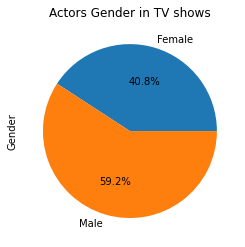

In [40]:
#Creating a pie chart based on the gender percentages 
gender_pie = gender_percentage.plot(kind="pie", y='Gender', autopct='%1.1f%%', title=("Actors Gender in TV shows"))
gender_pie.set_ylabel("Gender")

plt.show()

# Question 4

How does the average TV show rating change over different days of the week?

In [42]:
q1URL = "http://api.tvmaze.com/shows?page="
#TO DO: Make the page numbers randomly generated?
pages = ["0","1","2","3","4","5","6", "7", "8", "9"]

recordnum=1

days = []
ratings= []
ids=[]
listlength = len(ids)

print("starting pull Q4")

#this pulls every ID from the first 10 pages
for page in pages:
    target_urlq1 = q1URL + page
    response =requests.get(target_urlq1).json()
    for x in response:
        ids.append(x['id'])
print(f"ids done")

#this pulls every rating average from the first 10 pages
for page in pages:
    target_urlq1 = q1URL + page
    response =requests.get(target_urlq1).json()    
    for i in response:
        ratings.append(i['rating']['average'])
        
print(f"ratings done")

for page in pages:
    target_urlq1 = q1URL + page
    response =requests.get(target_urlq1).json()
    for w in response:
        try:
            days.append(w['schedule']['days'][0])
        except:
            days.append("No Listed Day")

print(f"days done")
print("pull completed")
print("Length check:")
print(len(days))
print(len(ids))
print(len(ratings))

starting pull Q4
ids done
ratings done
days done
pull completed
Length check:
2385
2385
2385


In [43]:
quest4df = pd.DataFrame({'IDs': ids, "Days": days, "Ratings": ratings})
#sorting values by ratings, probably optional
quest4df.sort_values(by=['Ratings'], inplace=True, ascending=False)
quest4df.head()

,IDs,Days,Ratings
590,607,Monday,9.5
745,768,Sunday,9.5
450,465,Sunday,9.4
2039,2122,Sunday,9.3
171,180,Friday,9.2


In [44]:
#dropping any values with no ratings
quest4dfclean = quest4df.dropna(how="any")
quest4dfclean.head()

,IDs,Days,Ratings
590,607,Monday,9.5
745,768,Sunday,9.5
450,465,Sunday,9.4
2039,2122,Sunday,9.3
171,180,Friday,9.2


In [45]:
#this is also probably optional. This is counting how many times each day is in our dataframe. Important for any data interpretation we may do. Otherwise, not needed. 
dayscolumn = quest4dfclean["Days"]

q4counts =dayscolumn.value_counts(sort=True)

q4countsdf = pd.DataFrame(q4counts)

q4countsdf.head()

,Days
Sunday,288
Monday,249
Friday,208
Wednesday,205
Tuesday,199


In [46]:
#grouping by days
groupquest4dfclean = quest4dfclean.groupby('Days')
#getting descriptive data for each day
describetest=groupquest4dfclean['Ratings'].describe()
#tossing the descriptive data into a df
describedf = pd.DataFrame(describetest)
#getting rid of the extra columns in the describe function we don't need in our dataframe for the graph
describedf.drop(['count', 'std', 'min','25%', '50%','75%','max'], inplace= True, axis=1)
describedf.head()

,mean
Days,
Friday,7.650000
Monday,7.553815
No Listed Day,7.815517
Saturday,7.582609
Sunday,7.851736


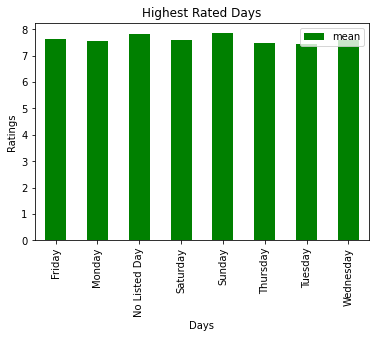

<Figure size 2880x1440 with 0 Axes>

<Figure size 432x288 with 0 Axes>

In [47]:
#Days plot

describedf.plot(kind="bar", facecolor='green', width=.5)


plt.ylabel("Ratings")
plt.xlabel("Days")
plt.title("Highest Rated Days")
plt.figure(figsize=(40,20))
plt.show()

#plt.savefig("HighestRatedDays.png")

In [48]:


# newlist= ["End","Beginning","N/A", "End", "Beginning","End", "Beginning", "Beginning"]
# groupquest4dfclean2["Week Portion"] = newlist
groupquest4dfclean2 = quest4dfclean.groupby('Days')

describetest2= groupquest4dfclean2['Ratings'].describe()
#tossing the descriptive data into a df
describedf2 = pd.DataFrame(describetest2)
describedf2.head()
#getting rid of the extra columns in the describe function we don't need in our dataframe for the graph
describedf2.drop(['count', 'std', 'min','25%', '50%','75%','max'], inplace= True, axis=1)


describenew2 = pd.DataFrame({'Mean': describedf2['mean'] , 'Week Portion':["End","Beginning","N/A", "End", "Beginning","End", "Beginning", "Beginning"]})
describenew2 = describenew2.reset_index().set_index('Week Portion')
describenew2.head()


,Days,Mean
Week Portion,,
End,Friday,7.650000
Beginning,Monday,7.553815
N/A,No Listed Day,7.815517
End,Saturday,7.582609
Beginning,Sunday,7.851736


In [49]:
describenew3 = pd.DataFrame({'Mean': describenew2['Mean']})
describenew3 = describenew3.groupby('Week Portion')
meanweekgroups =describenew3.mean()
meanweekgroups = meanweekgroups["Beginning":"End"]
meanweekgroups.head()
# meanweekgroups = meanweekgroups.drop(meanweekgroups == 'N/A', inplace=True)

,Mean
Week Portion,
Beginning,7.611741
End,7.575974


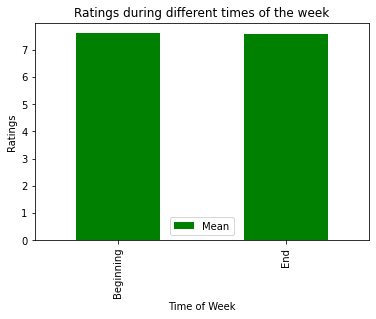

<Figure size 2880x1440 with 0 Axes>

<Figure size 432x288 with 0 Axes>

In [50]:

meanweekgroups.plot(kind="bar", facecolor='green', width=.5)


plt.ylabel("Ratings")
plt.xlabel("Time of Week")
plt.title("Ratings during different times of the week")
plt.figure(figsize=(40,20))
plt.show()

#plt.savefig("RatingsDuringWeek.png")